<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219902 entries, 0 to 219901
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    219902 non-null  float64
 1   V1      219901 non-null  float64
 2   V2      219901 non-null  float64
 3   V3      219901 non-null  float64
 4   V4      219901 non-null  float64
 5   V5      219901 non-null  float64
 6   V6      219901 non-null  float64
 7   V7      219901 non-null  float64
 8   V8      219901 non-null  float64
 9   V9      219901 non-null  float64
 10  V10     219901 non-null  float64
 11  V11     219901 non-null  float64
 12  V12     219901 non-null  float64
 13  V13     219901 non-null  float64
 14  V14     219901 non-null  float64
 15  V15     219901 non-null  float64
 16  V16     219901 non-null  float64
 17  V17     219901 non-null  float64
 18  V18     219901 non-null  float64
 19  V19     219901 non-null  float64
 20  V20     219901 non-null  float64
 21  V21     21

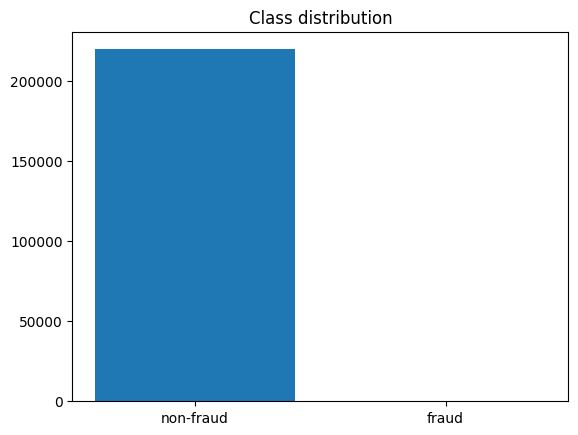

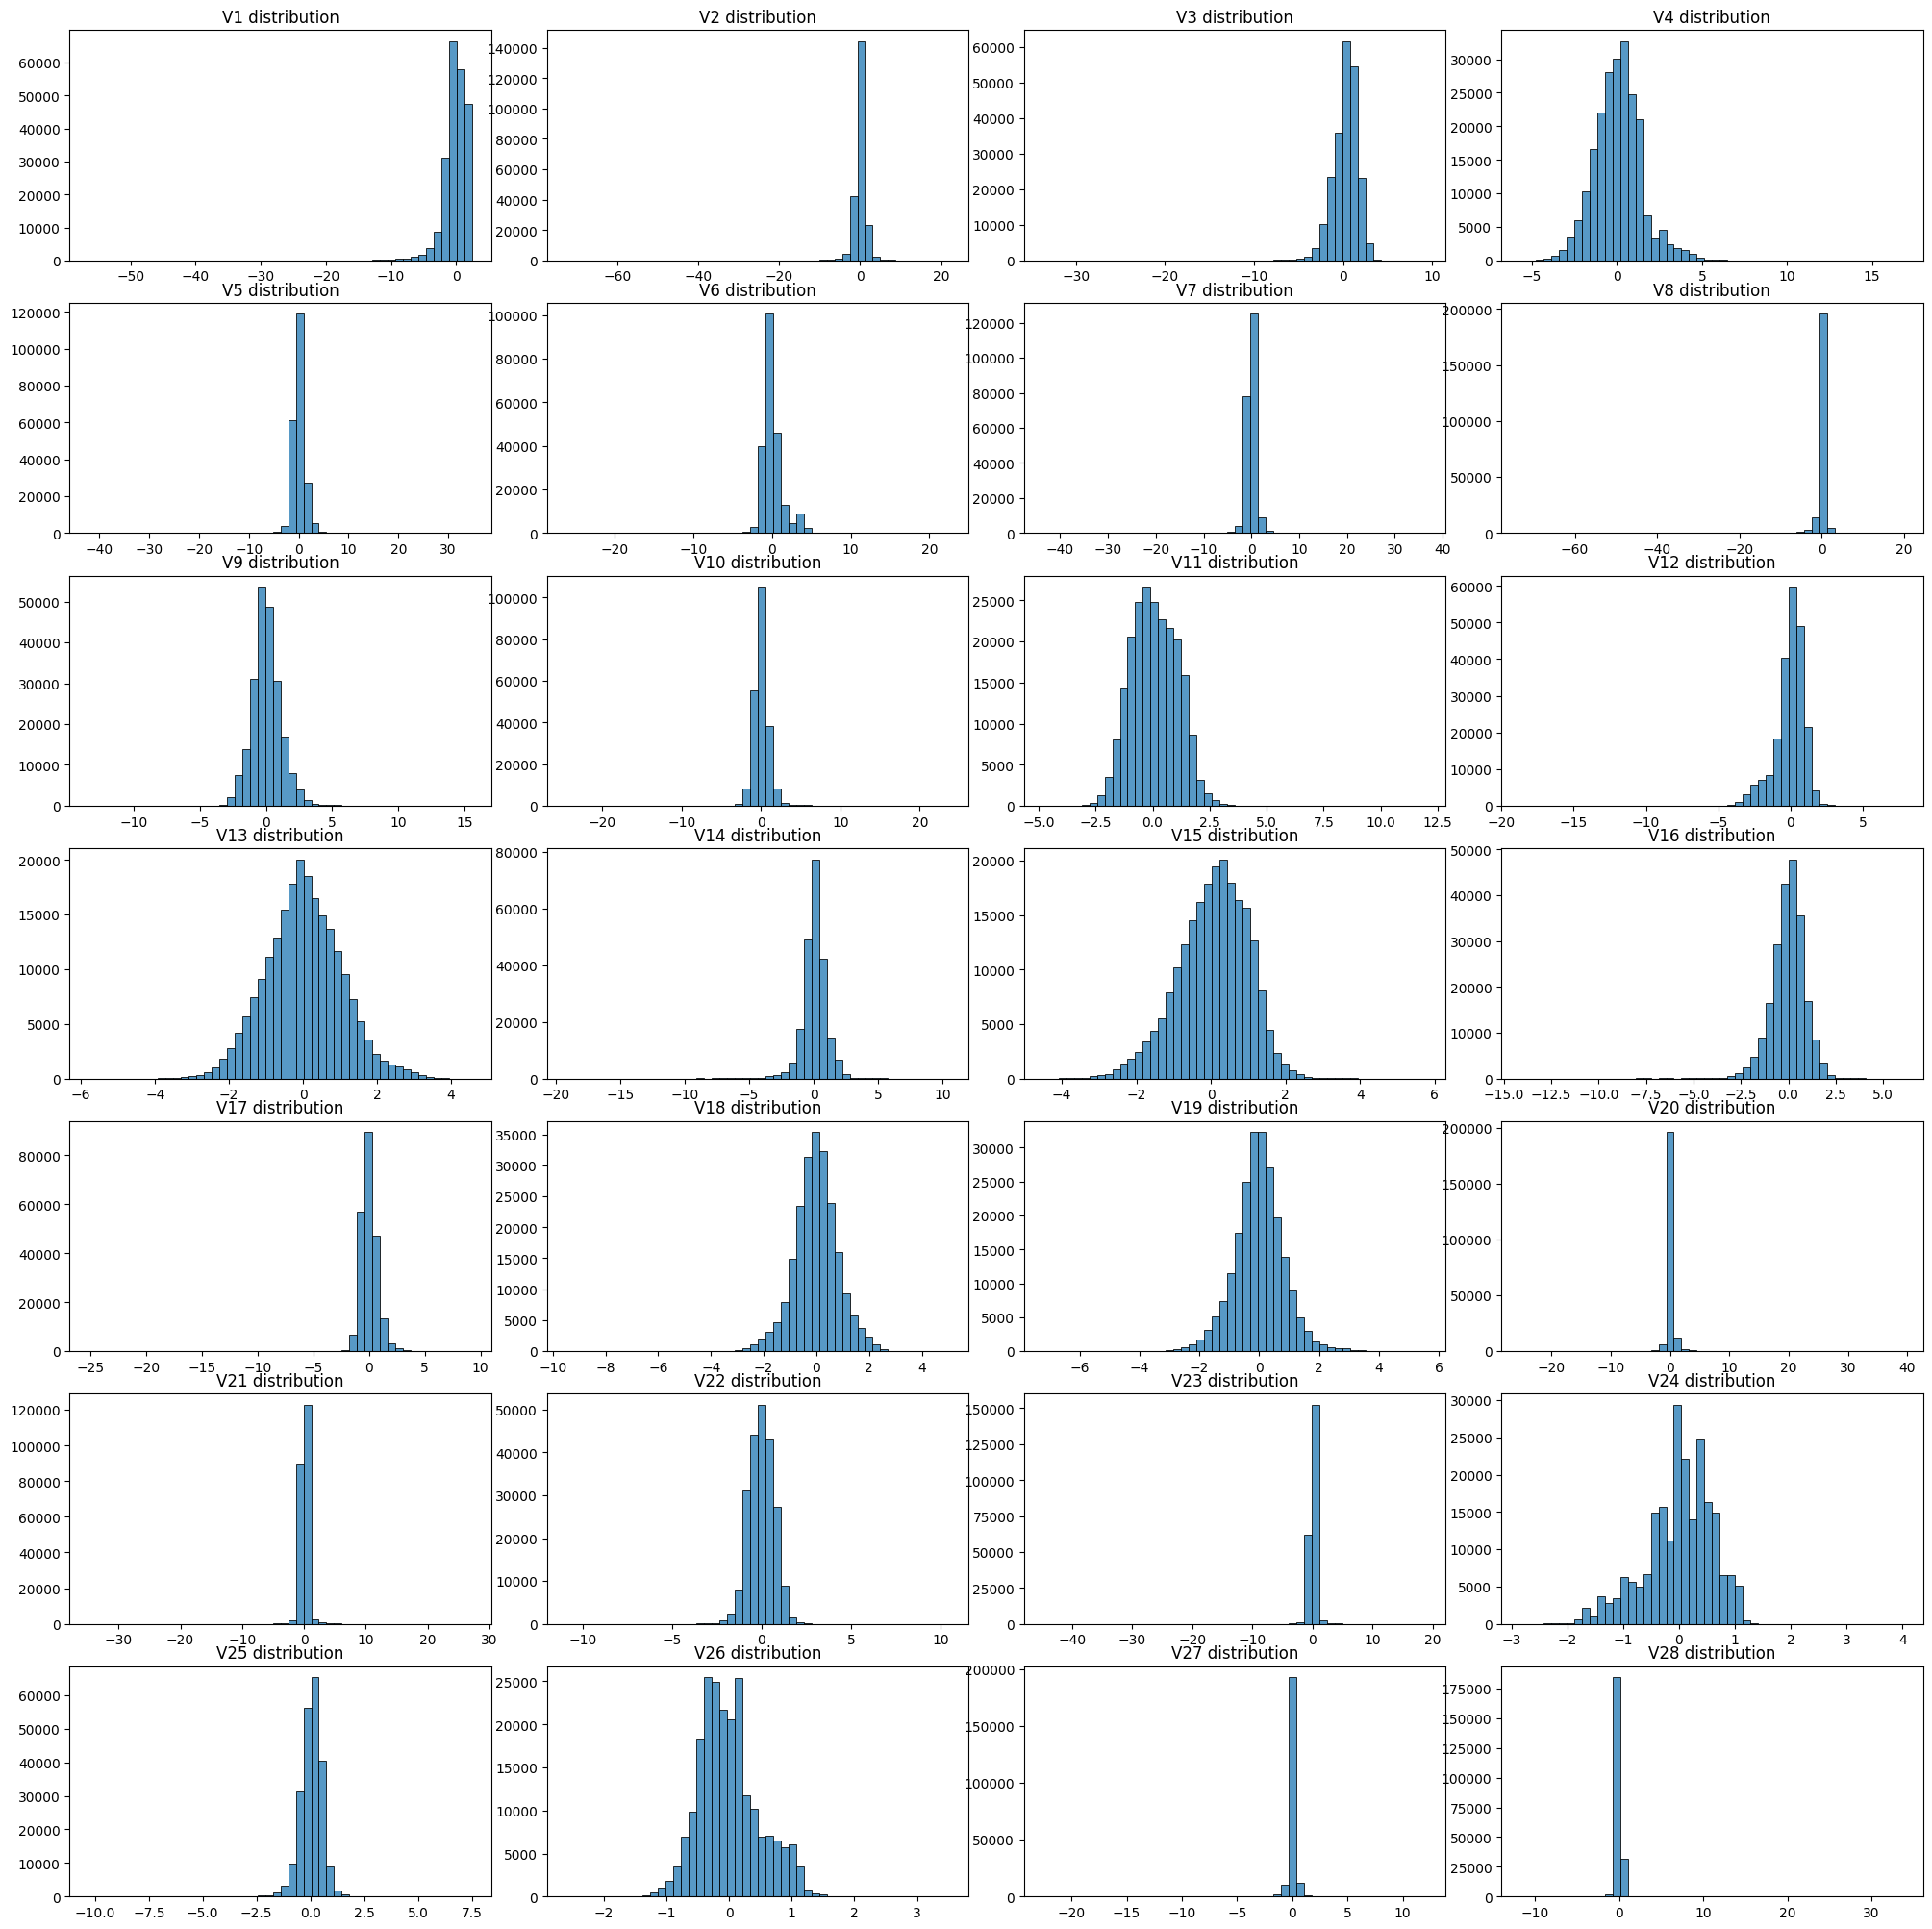

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#load the data
df = pd.read_csv('/content/creditcard.csv')

#undersatnd the dataset structure
print(df.info())
print(df.isnull().sum()) #searching for missing values

#sta summary
print(df.describe())

#class distribution
fraud_count = df['Class'].value_counts()
print(fraud_count)
plt.bar(fraud_count.index, fraud_count.values)
plt.title('Class distribution')
plt.xticks([0, 1], ['non-fraud', 'fraud'])
plt.show()

#pca hist
fig, axes = plt.subplots(ncols=4, nrows=7, figsize=(20,20))
fig.tight_layout()
for i, ax in enumerate(axes.flatten()):
  if i < 28 :
    sns.histplot(df[f'V{i+1}'], bins=50, ax=ax)
    ax.set_title(f'V{i+1} distribution')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.show()

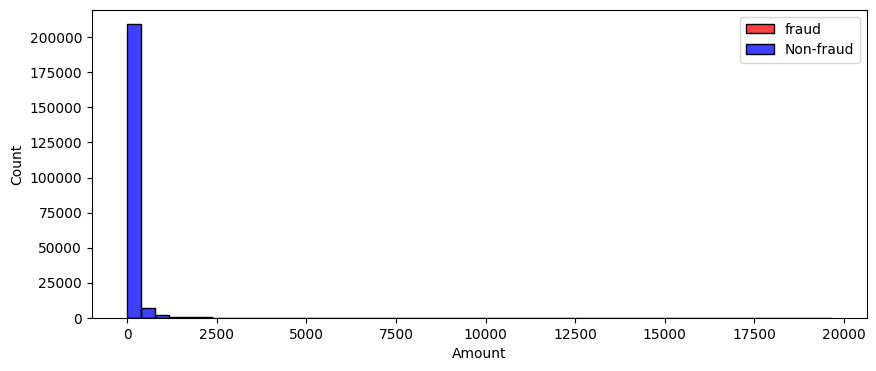

In [ ]:
#analys the amount transactions per calss
plt.figure(figsize=(10,4))
sns.histplot(df[df['Class']==1]['Amount'], bins=50, color='red', label='fraud')
sns.histplot(df[df['Class']==0]['Amount'], bins=50, color='blue', label='Non-fraud')
plt.legend()
plt.show()


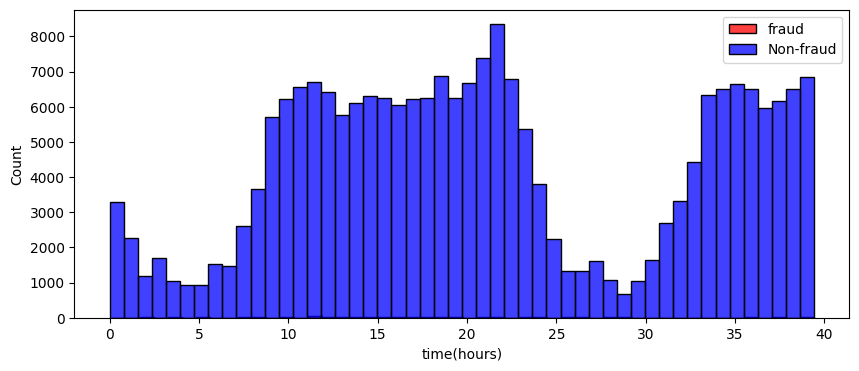

In [ ]:
#the time
df['Time_hr']= df['Time']/3600
plt.figure(figsize=(10,4))
sns.histplot(df[df['Class']==1]['Time_hr'], bins=50, color='red', label='fraud')
sns.histplot(df[df['Class']==0]['Time_hr'], bins=50, color='blue', label='Non-fraud')
plt.legend()
plt.xlabel('time(hours)')
plt.show()

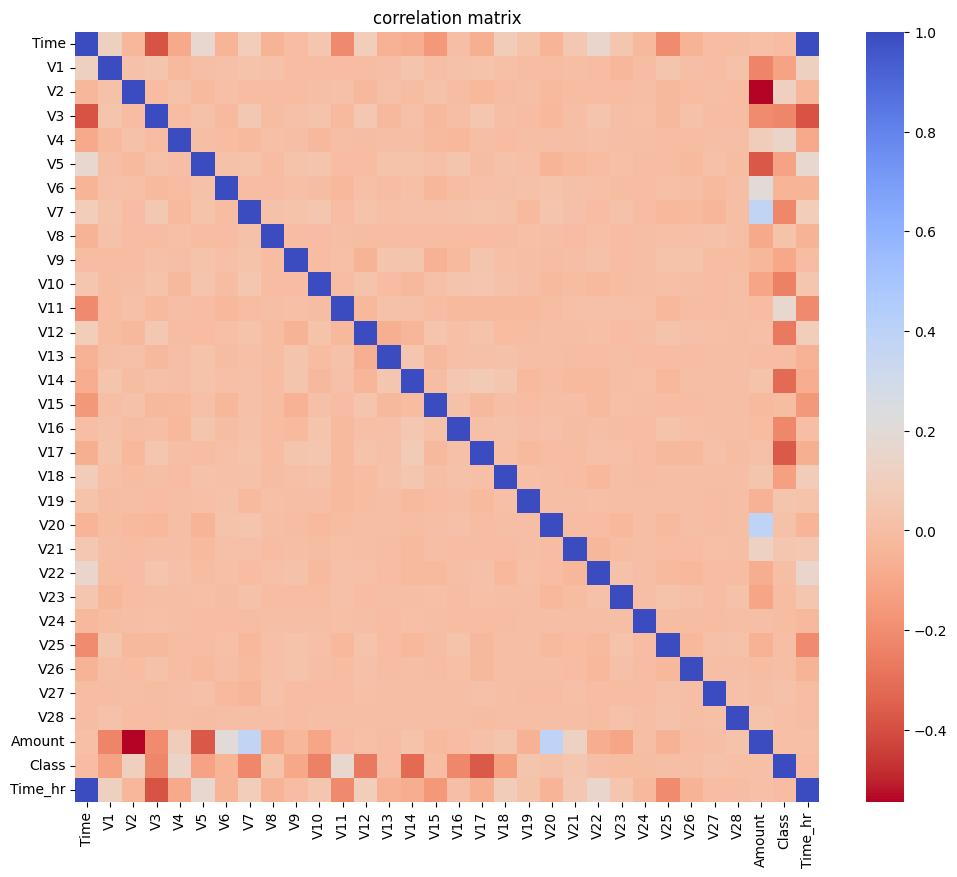

In [ ]:
#correlation
corr_matrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('correlation matrix')
plt.show()

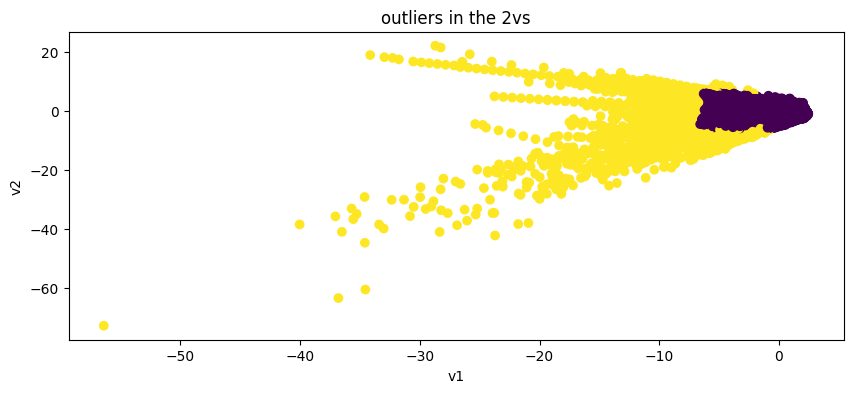

In [ ]:
#outliers
import numpy as np
outlier_fraction = 0.01
z_scores= np.abs(df - df.mean()/ df.std())
outliers = z_scores > z_scores.quantile(1- outlier_fraction)

plt.figure(figsize=(10,4))
plt.scatter(df['V1'], df['V2'], c= outliers['V1'] | outliers['V2'], cmap='viridis')
plt.title('outliers in the 2vs')
plt.xlabel('v1')
plt.ylabel('v2')
plt.show()


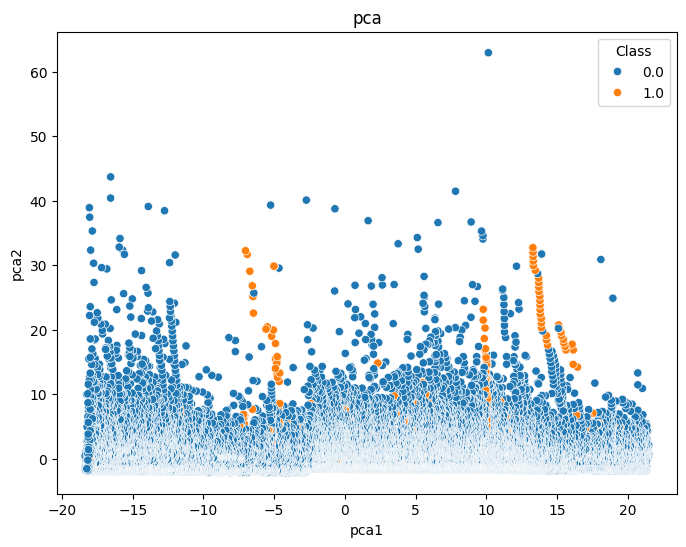

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imputed=pd.DataFrame(imputer.fit_transform(df.drop(['Class', 'Time', 'Amount'], axis=1)), columns=df.columns[1:-2])

pca = PCA(n_components=2)
df_pca =pca.fit_transform(df_imputed)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df['Class'])
plt.title('pca')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()


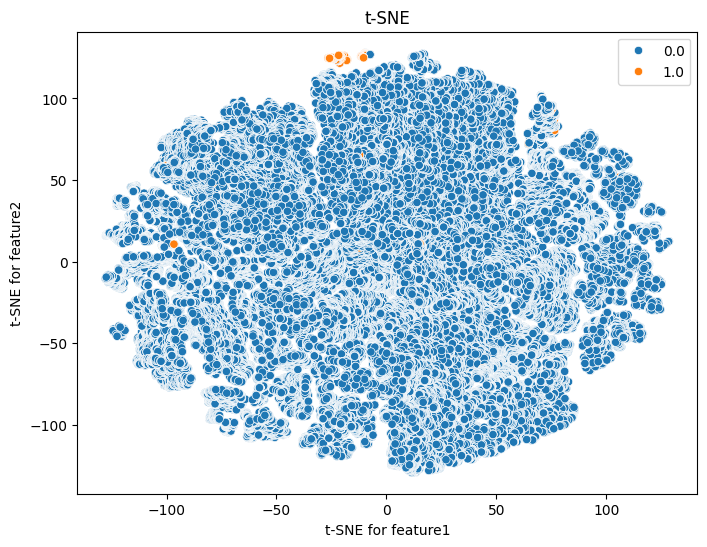

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imputed=pd.DataFrame(imputer.fit_transform(df.drop(['Class', 'Time', 'Amount'], axis=1)),
                        columns=df.columns.drop(['Class', 'Time', 'Amount']))



tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_imputed)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_tsne[:,0], y=df_tsne[:,1], hue=df['Class'].to_numpy())
plt.title('t-SNE')
plt.xlabel('t-SNE for feature1')
plt.ylabel('t-SNE for feature2')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

x= df.drop('Class', axis=1)
y= df['class']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0,2, random_state=42)
svm = SVC(kernel='rbf', class_weight='blalnced', probability=True)

param_gird={
    'C': [0.1,  1, 10],
    'gamma': [,0.001, 0.01,, 0.1 ]
}

grid_search=GridSearchCV(svm, param_grid, cv=5, scoring'roc_auc', n_jobs=-1)
grid_search.fit(x_smote, y_smote)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

y_pred=grid_search.predict(x_test)

print(classifciaction_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
precisoin, recall, thersholds=precisoin_recall_curve(y_test,grid_Search.decision_fucntion(x_Test))

auc_precisoin_recall=auc(recall, precisoin)

print(f'auc of precision-recall curve:{auc_precisoin_recall}')